In [1]:
# Load the extension and set it to autoreload all modules.
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt

from general.spectrogram import SpectrogramLoader
from general.keras import Trainer
from svd.dataloader import SVDDataLoader
from svd.preprocessor import SVDPreprocessor
from svd.model import SVDModel

In [3]:
spectrogram_loader = SpectrogramLoader()
data_loader = SVDDataLoader(spectrogram_loader)
preprocessor = SVDPreprocessor()
trainer = Trainer(SVDModel())

In [4]:
from general.keras import prepare_session
prepare_session()

In [ ]:
d = data_loader.load()
print('Loading: done!')
preprocessor.preprocess(d)
print('Preprocessing: done!')

In [6]:
preprocessor.preprocess(d)
print('Preprocessing: done!')
history = trainer.fit_model(d)

Preprocessing: done!
Train on 531 samples, validate on 177 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
531/531 [==============================] - 10s 19ms/sample - loss: 0.9163 - acc: 0.5028 - val_loss: 0.6890 - val_acc: 0.4520
Epoch 2/100
531/531 [==============================] - 3s 6ms/sample - loss: 0.6926 - acc: 0.5932 - val_loss: 0.6859 - val_acc: 0.6271
Epoch 3/100
531/531 [==============================] - 1s 3ms/sample - loss: 0.6876 - acc: 0.6309 - val_loss: 0.6748 - val_acc: 0.6384
Epoch 4/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6909 - acc: 0.6309 - val_loss: 0.6825 - val_acc: 0.6271
Epoch 5/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6832 - acc: 0.6252 - val_loss: 0.6796 - val_acc: 0.6271
Epoch 6/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6777 - acc: 0.6271 - val_loss: 0.6765 - val_acc: 0.6271
Epoch 7/100
531/531 [==============================] - 1s 2ms/sample - lo

Epoch 59/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6598 - acc: 0.6271 - val_loss: 0.6606 - val_acc: 0.6271
Epoch 60/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6608 - acc: 0.6271 - val_loss: 0.6606 - val_acc: 0.6271
Epoch 61/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6632 - acc: 0.6271 - val_loss: 0.6606 - val_acc: 0.6271
Epoch 62/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6665 - acc: 0.6271 - val_loss: 0.6606 - val_acc: 0.6271
Epoch 63/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6619 - acc: 0.6271 - val_loss: 0.6606 - val_acc: 0.6271
Epoch 64/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6619 - acc: 0.6271 - val_loss: 0.6607 - val_acc: 0.6271
Epoch 65/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6613 - acc: 0.6271 - val_loss: 0.6607 - val_acc: 0.6271
Epoch 66/100
531/531 [==========================

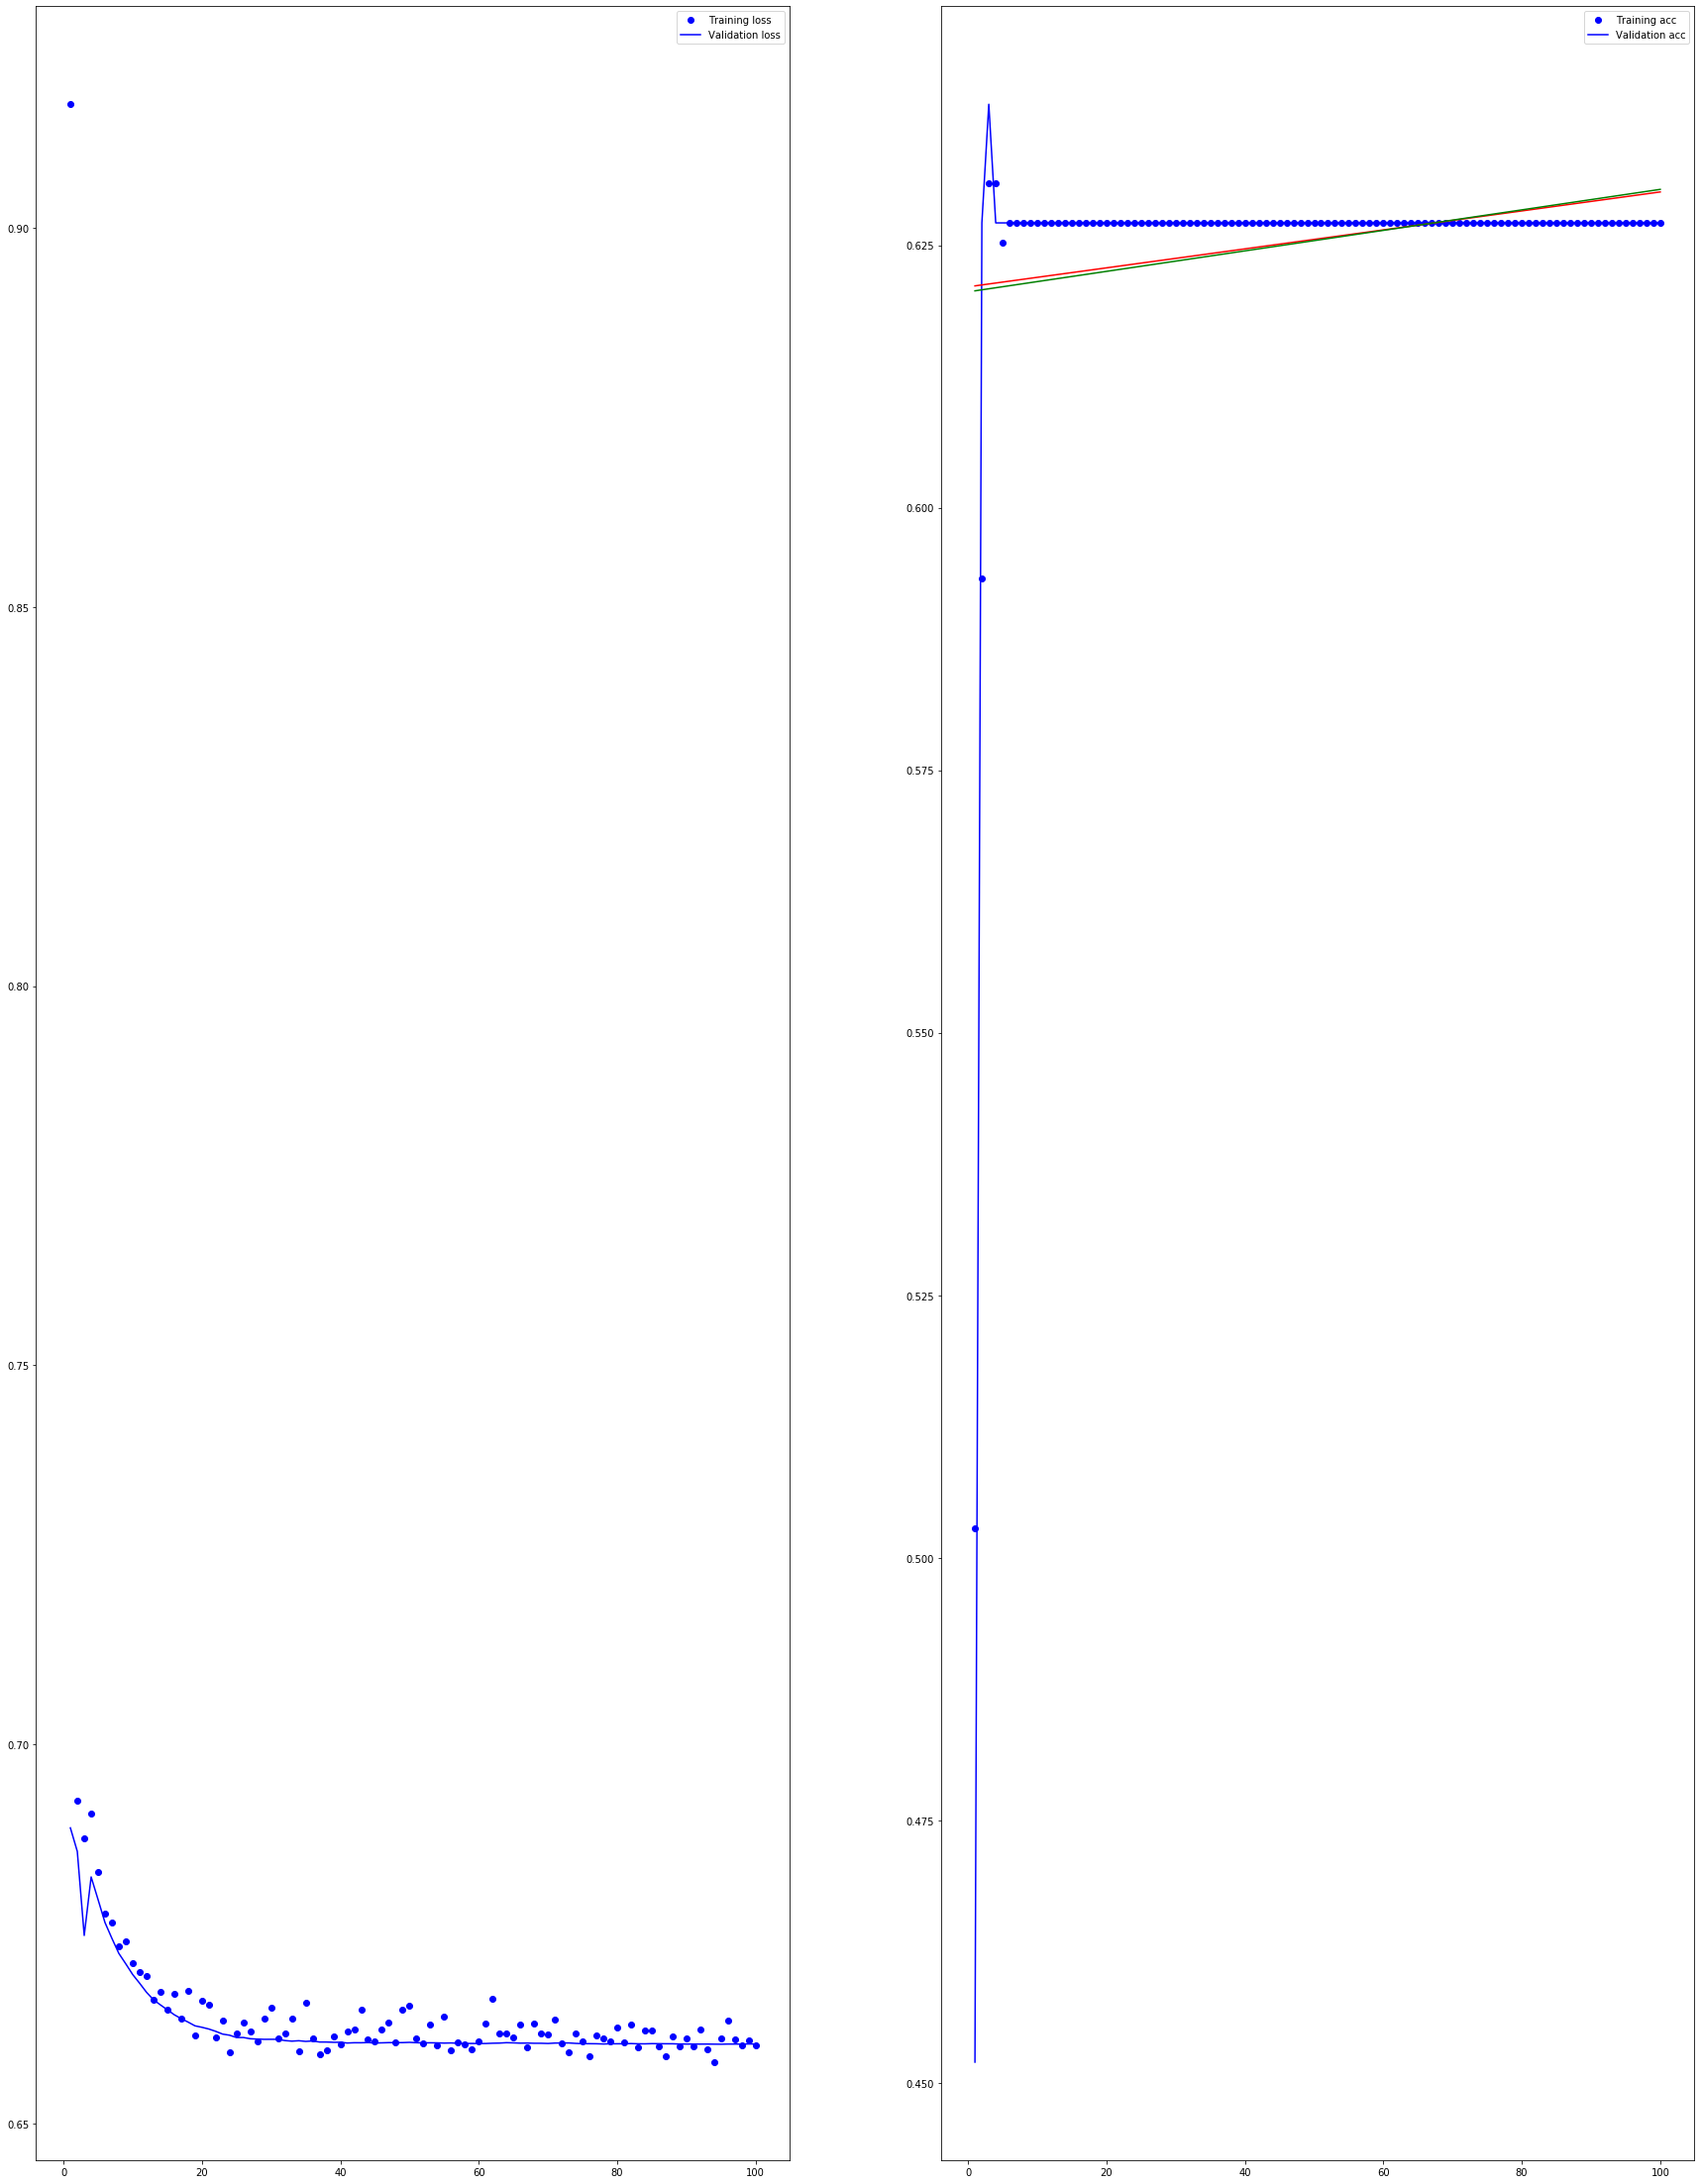

In [12]:
from general.visualization import visualize_history

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(30, 40))
visualize_history(fig, axs, 0, history)